In [55]:
import pandas as pd
df = pd.read_excel("GPTW.xlsx")

In [56]:
headers = df.iloc[2]
df = df[5:]
df.columns = headers
df = df.reset_index(drop=True)
new_columns = ["Category", "Question", "Overall"]
df.columns = new_columns + list(df.columns[3:])
df["Category"] = df["Category"].fillna(method="ffill")

df.head(5)

C:\Users\Ayushee\AppData\Local\Temp\ipykernel_28572\4057879241.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Category"] = df["Category"].fillna(method="ffill")


,Category,Question,Overall,25 years or younger,26 years to 34 years,35 years to 44 years,45 years to 54 years,55 years or older,NaN,1000,...,NaN,Less than 2 years,2 years to 5 years,6 years to 10 years,11 years to 15 years,16 years to 20 years,Over 20 years,NaN,Full-time,Part-time
0,Statements,I am given the resources and equipment to do m...,71,70,70,69,76,79,NaN,87,...,NaN,72,73,66,66,73,78,NaN,70,80
1,Statements,This is a physically safe place to work.,86,84,86,86,87,84,NaN,93,...,NaN,88,85,83,84,87,90,NaN,86,86
2,Statements,Everyone has an opportunity to get special rec...,58,55,57,57,63,64,NaN,68,...,NaN,63,58,53,52,54,63,NaN,57,65
3,Statements,People here are willing to give extra to get t...,71,68,70,71,74,76,NaN,77,...,NaN,72,70,68,70,73,77,NaN,71,74
4,Statements,You can count on people to cooperate.,66,63,66,67,67,69,NaN,72,...,NaN,68,66,64,63,66,70,NaN,66,72


In [57]:
filtered_df = df[df["Category"] == "Statements"]
filtered_df.head()

# List of key statements to filter
key_statements = [
    "I am offered training or development to further myself professionally.",
    "Promotions go to those who best deserve them.",
    "Management shows appreciation for good work and extra effort.",
    "People care about each other here.",
    "People here are treated fairly regardless of their race.",
    "People here are treated fairly regardless of their sexual orientation.",
    "People here are treated fairly regardless of their gender.",
    "People here are treated fairly regardless of their age.",
    "People here are paid fairly for the work they do.",
    "Management delivers on its promises.",
    "Management is honest and ethical in its business practices.",
    "If I am unfairly treated, I believe I'll be given a fair shake if I appeal.",
    'My work has special meaning: this is not "just a job."',
    "I feel I make a difference here.",
    "When I look at what we accomplish, I feel a sense of pride.",
    "I want to work here for a long time.",
    "Management is approachable, easy to talk with.",
    "Management recognizes honest mistakes as part of doing business.",
    "Management keeps me informed about important issues and changes.",
    "Management trusts people to do a good job without watching over their shoulders.",
    'There is a "family" or "team" feeling here.',
    "We're all in this together.",
    "People are encouraged to balance their work life and their personal life.",
    "When people change jobs or work units, they are made to feel right at home.",
    "Taking everything into account, I would say this is a great place to work.",
]

# Filter the DataFrame based on the Question column
filtered_key_statements_df = filtered_df[filtered_df["Question"].isin(key_statements)]

# Display the filtered DataFrame
filtered_key_statements_df.head()

,Category,Question,Overall,25 years or younger,26 years to 34 years,35 years to 44 years,45 years to 54 years,55 years or older,NaN,1000,...,NaN,Less than 2 years,2 years to 5 years,6 years to 10 years,11 years to 15 years,16 years to 20 years,Over 20 years,NaN,Full-time,Part-time
7,Statements,I am offered training or development to furthe...,65,62,63,66,68,69,NaN,63,...,NaN,67,64,61,62,64,68,NaN,64,67
8,Statements,Management shows appreciation for good work an...,63,63,63,62,66,69,NaN,71,...,NaN,69,64,58,56,59,66,NaN,63,69
9,Statements,People here are paid fairly for the work they do.,50,51,48,50,53,55,NaN,58,...,NaN,56,49,45,44,46,52,NaN,50,54
10,Statements,"My work has special meaning: this is not ""just...",76,68,73,79,83,81,NaN,75,...,NaN,75,75,75,79,82,83,NaN,77,69
11,Statements,"When people change jobs or work units, they ar...",71,67,71,70,72,76,NaN,82,...,NaN,72,73,68,66,70,74,NaN,70,74


In [58]:
filtered_key_statements_df.shape

(25, 4433)

In [76]:
categories_weights = {
    "Opportunities for Growth and Development": 0.05,
    "Work Environment and Relationships": 0.2,
    "Trust and Fairness": 0.25,
    "Job Satisfaction and Meaning": 0.1,
    "Supportive Management": 0.25,
    "Team and Community Feel": 0.15,
}

# Count the number of rows for each category
category_counts = filtered_key_statements_df['Category'].value_counts()

# Calculate new weights
new_weights = {}
for category, weight in categories_weights.items():
    count = category_counts.get(category, 0)  # Get the count, default to 0 if not present
    if count > 0:  # Avoid division by zero
        new_weight = weight / count
    else:
        new_weight = 0  # Assign 0 weight if no rows are present for the category
    new_weights[category] = new_weight

# Print the new weights
new_weights

{'Opportunities for Growth and Development': np.float64(0.025),
 'Work Environment and Relationships': np.float64(0.06666666666666667),
 'Trust and Fairness': np.float64(0.027777777777777776),
 'Job Satisfaction and Meaning': np.float64(0.025),
 'Supportive Management': np.float64(0.08333333333333333),
 'Team and Community Feel': np.float64(0.0375)}

In [77]:
# Define the categories and their corresponding weights
# categories_weights = {
#     "Opportunities for Growth and Development": 0.125,
#     "Work Environment and Relationships": 0.05,
#     "Trust and Fairness": 0.017,
#     "Job Satisfaction and Meaning": 0.05,
#     "Supportive Management": 0.03,
#     "Team and Community Feel": 0.025,
# }


categories_weights = new_weights

# Function to assign categories based on keywords in the Question
def assign_category(question):
    # Check if question is NaN
    if pd.isna(question):
        return "Uncategorized"  # Or you can return None or any specific label for NaN
    question = question.lower()  # Convert to lowercase for consistent comparison
    if any(keyword in question for keyword in ["training", "development", "promotions"]):
        return "Opportunities for Growth and Development"
    elif any(
        keyword in question
        for keyword in ["care about each other", "relationships", "appreciation", "great place to work"]
    ):
        return "Work Environment and Relationships"
    elif any(keyword in question for keyword in ["trust", "fairness", "fairly", "promises", "ethical", "unfairly treated"]):
        return "Trust and Fairness"
    elif any(keyword in question for keyword in ["meaning", "make a difference", "sense of pride", 'long time']):
        return "Job Satisfaction and Meaning"
    elif any(
        keyword in question
        for keyword in ["approachable", "honest mistake", "keeps me informed", "trusts people"]
    ):
        return "Supportive Management"
    elif any(keyword in question for keyword in ["team", "community", "all in", "balance", "right at home"]):
        return "Team and Community Feel"
    else:
        return "Uncategorized"  # Default category for unmatched questions


# Apply the category assignment function to create a new Category column
filtered_key_statements_df["Category_new"] = filtered_key_statements_df["Question"].apply(assign_category)

# Map weights to the new Category column
filtered_key_statements_df["Weight"] = filtered_key_statements_df["Category_new"].map(categories_weights)
# filtered_key_statements_df["Question"] = filtered_key_statements_df["Question"]

# Display the updated DataFrame with the new columns
filtered_key_statements_df[["Category_new", "Question", "Weight"]].head(2)

,Category_new,Question,Weight
0,Opportunities for Growth and Development,I am offered training or development to furthe...,0.025000
1,Work Environment and Relationships,Management shows appreciation for good work an...,0.066667


In [78]:
filtered_key_statements_df.reset_index(drop=True, inplace=True)
filtered_key_statements_df = filtered_key_statements_df.drop('Category', axis=1)
filtered_key_statements_df = filtered_key_statements_df.rename(columns={'Category_new': 'Category'})

In [79]:
filtered_key_statements_df.head(2)

,Question,Overall,25 years or younger,26 years to 34 years,35 years to 44 years,45 years to 54 years,55 years or older,NaN,1000,1400.0,...,2 years to 5 years,6 years to 10 years,11 years to 15 years,16 years to 20 years,Over 20 years,NaN,Full-time,Part-time,Weight,Category
0,I am offered training or development to furthe...,65,62,63,66,68,69,NaN,63,70.0,...,64,61,62,64,68,NaN,64,67,0.025000,Opportunities for Growth and Development
1,Management shows appreciation for good work an...,63,63,63,62,66,69,NaN,71,63.0,...,64,58,56,59,66,NaN,63,69,0.066667,Work Environment and Relationships


In [80]:
df = filtered_key_statements_df
duplicate_columns = df.columns.duplicated()

# Drop the duplicate columns (keeping only the first occurrence)
df = df.loc[:, ~duplicate_columns]

new_rows = []
df = df.loc[:, ~df.columns.isna()]

for index, row in df.iterrows():
    new_row = {'Question': row['Question'], 'Category': row['Category']}
    total_weighted = 0  
    
    for col in df.columns:
    
        if col not in ['Question', 'Category', 'Weight', 'NaN']:
            weighted_value = row[col] * row['Weight']  
            new_row[col] = weighted_value  
    
    new_rows.append(new_row)


new_df = pd.DataFrame(new_rows)

df = df.reset_index(drop=True)
new_df = new_df.reset_index(drop=True)

df_with_weights = pd.concat([df, new_df], ignore_index=True)

summed_row = new_df.sum(numeric_only=True)
summed_row['Question'] = 'Total'
summed_row['Category'] = 'Total'

avg_row = new_df.mean(numeric_only=True)
avg_row['Question'] = 'AVG'
avg_row['Category'] = 'AVG'

summed_row_df = pd.DataFrame([summed_row])
avg_row_df = pd.DataFrame([avg_row])

df_with_weights = pd.concat([df_with_weights, summed_row_df, avg_row_df], ignore_index=True)

df_with_weights


,Question,Overall,25 years or younger,26 years to 34 years,35 years to 44 years,45 years to 54 years,55 years or older,1000,1400.0,1900.0,...,Less than 2 years,2 years to 5 years,6 years to 10 years,11 years to 15 years,16 years to 20 years,Over 20 years,Full-time,Part-time,Weight,Category
0,I am offered training or development to furthe...,65,62,63,66,68,69,63,70.000000,63.000000,...,67,64,61,62,64,68,64,67,0.025000,Opportunities for Growth and Development
1,Management shows appreciation for good work an...,63,63,63,62,66,69,71,63.000000,72.000000,...,69,64,58,56,59,66,63,69,0.066667,Work Environment and Relationships
2,People here are paid fairly for the work they do.,50,51,48,50,53,55,58,38.000000,50.000000,...,56,49,45,44,46,52,50,54,0.027778,Trust and Fairness
3,"My work has special meaning: this is not ""just...",76,68,73,79,83,81,75,73.000000,62.000000,...,75,75,75,79,82,83,77,69,0.025000,Job Satisfaction and Meaning
4,"When people change jobs or work units, they ar...",71,67,71,70,72,76,82,67.000000,73.000000,...,72,73,68,66,70,74,70,74,0.037500,Team and Community Feel
5,"Management is approachable, easy to talk with.",71,70,71,70,73,75,78,69.000000,78.000000,...,75,73,65,66,67,74,70,76,0.083333,Supportive Management
6,Management recognizes honest mistakes as part ...,69,67,68,68,72,76,81,61.000000,73.000000,...,73,68,65,64,68,73,68,75,0.083333,Supportive Management
7,"When I look at what we accomplish, I feel a se...",84,79,83,85,87,87,86,89.000000,80.000000,...,84,84,82,83,85,88,84,82,0.025000,Job Satisfaction and Meaning
8,Management keeps me informed about important i...,69,73,69,68,71,71,72,66.000000,75.000000,...,76,70,62,63,65,71,69,73,0.083333,Supportive Management
9,Management trusts people to do a good job with...,73,71,72,72,76,79,81,77.000000,74.000000,...,75,73,70,67,71,78,72,77,0.027778,Trust and Fairness


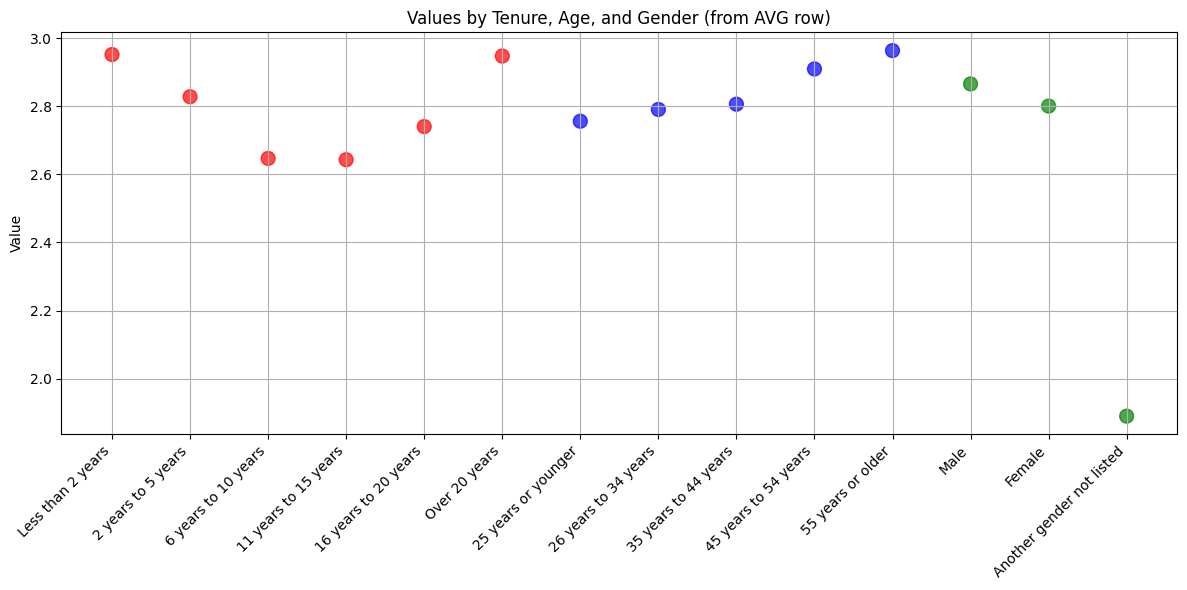

In [81]:
import matplotlib.pyplot as plt


avg_row = df_with_weights[df_with_weights['Category'] == 'AVG']

# Check if the filtered DataFrame is empty
# Extract values for Tenure, Age, and Gender without averaging
tenure_columns = [
    'Less than 2 years',
    '2 years to 5 years',
    '6 years to 10 years',
    '11 years to 15 years',
    '16 years to 20 years',
    'Over 20 years'
]

age_columns = [
    '25 years or younger',
    '26 years to 34 years',
    '35 years to 44 years',
    '45 years to 54 years',
    '55 years or older'
]

gender_columns = [
    'Male',
    'Female',
    'Another gender not listed'
]

# Combine all columns for plotting
all_columns = tenure_columns + age_columns + gender_columns
avg_values = avg_row[all_columns].values.flatten()

# Create a list of colors for each category
colors = ['red'] * len(tenure_columns) + ['blue'] * len(age_columns) + ['green'] * len(gender_columns)

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(range(len(avg_values)), avg_values, color=colors, s=100, alpha=0.7)

# Adding title and labels
plt.title('Values by Tenure, Age, and Gender (from AVG row)')
plt.xticks(range(len(avg_values)), all_columns, rotation=45, ha='right')
plt.ylabel('Value')

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
qualities = [
    "Average of All Statements",
    "Camaraderie",
    "Caring",
    "Collaboration",
    "Communication",
    "Community",
    "Competence",
    "Corporate Image",
    "Credibility",
    "Engagement",
    "Equity",
    "Fairness",
    "Hospitality",
    "Impartiality",
    "Innovation",
    "Integrity",
    "Intimacy",
    "Justice",
    "Leadership Behavior",
    "Personal Job",
    "Pride",
    "Respect",
    "Support",
    "Team",
]

filtered_df = df[df["Category"].isin(qualities)]
last_rows = filtered_df.groupby("Category").last().reset_index()
last_rows

,Category,Question,Overall,25 years or younger,26 years to 34 years,35 years to 44 years,45 years to 54 years,55 years or older,NaN,1000,...,NaN,Less than 2 years,2 years to 5 years,6 years to 10 years,11 years to 15 years,16 years to 20 years,Over 20 years,NaN,Full-time,Part-time
0,Average of All Statements,Average of All Statements Average,70,69,70,70,73,73,NaN,76,...,NaN,73,70,66,67,69,74,NaN,70,73
1,Camaraderie,Camaraderie Average,74,73,74,75,75,76,NaN,81,...,NaN,76,74,72,72,74,78,NaN,74,77
2,Caring,Caring Average,69,66,69,69,72,72,NaN,76,...,NaN,72,68,66,66,70,75,NaN,69,71
3,Collaboration,Collaboration Average,62,63,62,62,65,64,NaN,67,...,NaN,68,64,57,57,59,63,NaN,62,67
4,Communication,Communication Average,69,71,69,68,72,72,NaN,74,...,NaN,74,70,63,63,66,72,NaN,69,75
5,Community,Community Average,66,63,66,67,67,69,NaN,72,...,NaN,68,66,64,63,66,70,NaN,66,72
6,Competence,Competence Average,69,71,69,68,72,73,NaN,75,...,NaN,74,70,65,63,66,73,NaN,69,74
7,Corporate Image,Corporate Image Average,76,72,75,78,79,80,NaN,81,...,NaN,77,75,74,76,77,81,NaN,76,76
8,Credibility,Credibility Average,69,70,69,68,72,72,NaN,75,...,NaN,74,70,64,63,66,72,NaN,69,74
9,Engagement,Engagement Average,71,69,70,71,74,75,NaN,77,...,NaN,74,71,68,68,70,75,NaN,71,74


In [19]:
# Define the qualities to map as 'Emotional Benefits'
emotional_benefits = [
    "Camaraderie",
    "Caring",
    "Community",
    "Corporate Image",
    "Engagement",
    "Fairness",
    "Hospitality",
    "Impartiality",
    "Intimacy",
    "Justice",
    "Pride",
    "Respect",
]

# Create a new column in last_rows to identify 'Emotional Benefits'
last_rows["Benefit_Type"] = last_rows["Category"].apply(
    lambda x: "Emotional Benefit" if x in emotional_benefits else "Other"
)

# Output the dataframe
last_rows

,Category,Question,Overall,25 years or younger,26 years to 34 years,35 years to 44 years,45 years to 54 years,55 years or older,NaN,1000,...,Less than 2 years,2 years to 5 years,6 years to 10 years,11 years to 15 years,16 years to 20 years,Over 20 years,NaN,Full-time,Part-time,Benefit_Type
0,Average of All Statements,Average of All Statements Average,70,69,70,70,73,73,NaN,76,...,73,70,66,67,69,74,NaN,70,73,Other
1,Camaraderie,Camaraderie Average,74,73,74,75,75,76,NaN,81,...,76,74,72,72,74,78,NaN,74,77,Emotional Benefit
2,Caring,Caring Average,69,66,69,69,72,72,NaN,76,...,72,68,66,66,70,75,NaN,69,71,Emotional Benefit
3,Collaboration,Collaboration Average,62,63,62,62,65,64,NaN,67,...,68,64,57,57,59,63,NaN,62,67,Other
4,Communication,Communication Average,69,71,69,68,72,72,NaN,74,...,74,70,63,63,66,72,NaN,69,75,Other
5,Community,Community Average,66,63,66,67,67,69,NaN,72,...,68,66,64,63,66,70,NaN,66,72,Emotional Benefit
6,Competence,Competence Average,69,71,69,68,72,73,NaN,75,...,74,70,65,63,66,73,NaN,69,74,Other
7,Corporate Image,Corporate Image Average,76,72,75,78,79,80,NaN,81,...,77,75,74,76,77,81,NaN,76,76,Emotional Benefit
8,Credibility,Credibility Average,69,70,69,68,72,72,NaN,75,...,74,70,64,63,66,72,NaN,69,74,Other
9,Engagement,Engagement Average,71,69,70,71,74,75,NaN,77,...,74,71,68,68,70,75,NaN,71,74,Emotional Benefit


In [23]:
# Define the qualities to map as 'Emotional Benefits'
emotional_benefits = [
    "Camaraderie",
    "Caring",
    "Community",
    "Corporate Image",
    "Engagement",
    "Fairness",
    "Hospitality",
    "Impartiality",
    "Intimacy",
    "Justice",
    "Pride",
    "Respect",
]

# Create a new column 'Benefit_Type' and map values
df["Benefit_Type"] = df["Category"].apply(
    lambda x: "Emotional Benefit" if x in emotional_benefits else "Other"
)

# Verify if the column is correctly added
print(df[["Category", "Benefit_Type"]].head())

     Category Benefit_Type
0  Statements        Other
1  Statements        Other
2  Statements        Other
3  Statements        Other
4  Statements        Other


In [83]:
df = pd.read_excel("filtered_data_with_categories.xlsx")

In [85]:
df.shape

(24, 4433)

In [87]:
df.head(25)

,Category,Overall,25 years or younger,26 years to 34 years,35 years to 44 years,45 years to 54 years,55 years or older,Unnamed: 7,1000,1400,...,Less than 2 years,2 years to 5 years,6 years to 10 years,11 years to 15 years,16 years to 20 years,Over 20 years,Unnamed: 4429,Full-time,Part-time,Weight
0,Supportive Management,70.000000,74.000000,69.000000,69.000000,74.000000,71.000000,NaN,71.000000,70.000000,...,76.000000,70.000000,65.000000,64.000000,69.000000,72.000000,NaN,70.000000,76.000000,0.10
1,Supportive Management,66.000000,67.000000,66.000000,65.000000,70.000000,71.000000,NaN,77.000000,69.000000,...,71.000000,68.000000,61.000000,59.000000,65.000000,69.000000,NaN,65.000000,76.000000,0.10
2,Opportunities for Growth and Development,65.000000,62.000000,63.000000,66.000000,68.000000,69.000000,NaN,63.000000,70.000000,...,67.000000,64.000000,61.000000,62.000000,64.000000,68.000000,NaN,64.000000,67.000000,0.25
3,Supportive Management,63.000000,63.000000,63.000000,62.000000,66.000000,69.000000,NaN,71.000000,63.000000,...,69.000000,64.000000,58.000000,56.000000,59.000000,66.000000,NaN,63.000000,69.000000,0.10
4,Job Satisfaction and Meaning,76.000000,68.000000,73.000000,79.000000,83.000000,81.000000,NaN,75.000000,73.000000,...,75.000000,75.000000,75.000000,79.000000,82.000000,83.000000,NaN,77.000000,69.000000,0.15
5,Supportive Management,71.000000,70.000000,71.000000,70.000000,73.000000,75.000000,NaN,78.000000,69.000000,...,75.000000,73.000000,65.000000,66.000000,67.000000,74.000000,NaN,70.000000,76.000000,0.10
6,Supportive Management,69.000000,67.000000,68.000000,68.000000,72.000000,76.000000,NaN,81.000000,61.000000,...,73.000000,68.000000,65.000000,64.000000,68.000000,73.000000,NaN,68.000000,75.000000,0.10
7,Supportive Management,65.000000,65.000000,65.000000,63.000000,68.000000,65.000000,NaN,72.000000,61.000000,...,69.000000,66.000000,59.000000,60.000000,60.000000,68.000000,NaN,64.000000,71.000000,0.10
8,Supportive Management,69.000000,73.000000,69.000000,68.000000,71.000000,71.000000,NaN,72.000000,66.000000,...,76.000000,70.000000,62.000000,63.000000,65.000000,71.000000,NaN,69.000000,73.000000,0.10
9,Supportive Management,71.000000,72.000000,69.000000,70.000000,74.000000,75.000000,NaN,73.000000,74.000000,...,76.000000,72.000000,64.000000,63.000000,67.000000,75.000000,NaN,70.000000,76.000000,0.10


In [89]:
# Dropping the specified rows
df_filtered = df[
    ~df["Category"].isin(["Supportive Management", "Team and Community Feel"])
]

# Display the filtered DataFrame
print(df_filtered)

                                    Category    Overall  25 years or younger  \
2   Opportunities for Growth and Development  65.000000            62.000000   
4               Job Satisfaction and Meaning  76.000000            68.000000   
10                        Trust and Fairness  73.000000            71.000000   
22                Supportive Management_aggr  63.388889            64.277778   
23              Team and Community Feel_aggr  70.500000            69.000000   

    26 years to 34 years  35 years to 44 years  45 years to 54 years  \
2              63.000000             66.000000             68.000000   
4              73.000000             79.000000             83.000000   
10             72.000000             72.000000             76.000000   
22             63.166667             62.277778             65.888889   
23             69.500000             71.500000             72.500000   

    55 years or older  Unnamed: 7       1000       1400  ...  \
2           69.000000 

In [91]:
df_filtered.head(10)

,Category,Overall,25 years or younger,26 years to 34 years,35 years to 44 years,45 years to 54 years,55 years or older,Unnamed: 7,1000,1400,...,Less than 2 years,2 years to 5 years,6 years to 10 years,11 years to 15 years,16 years to 20 years,Over 20 years,Unnamed: 4429,Full-time,Part-time,Weight
2,Opportunities for Growth and Development,65.000000,62.000000,63.000000,66.000000,68.000000,69.000000,NaN,63.000000,70.000000,...,67.000000,64.000000,61.000000,62.000000,64.000000,68.000000,NaN,64.000000,67.000000,0.25
4,Job Satisfaction and Meaning,76.000000,68.000000,73.000000,79.000000,83.000000,81.000000,NaN,75.000000,73.000000,...,75.000000,75.000000,75.000000,79.000000,82.000000,83.000000,NaN,77.000000,69.000000,0.15
10,Trust and Fairness,73.000000,71.000000,72.000000,72.000000,76.000000,79.000000,NaN,81.000000,77.000000,...,75.000000,73.000000,70.000000,67.000000,71.000000,78.000000,NaN,72.000000,77.000000,0.15
22,Supportive Management_aggr,63.388889,64.277778,63.166667,62.277778,65.888889,66.833333,0.0,69.611111,61.777778,...,68.444444,64.277778,58.277778,57.111111,60.111111,66.166667,0.0,62.944444,68.722222,NaN
23,Team and Community Feel_aggr,70.500000,69.000000,69.500000,71.500000,72.500000,72.500000,NaN,69.500000,70.000000,...,72.500000,70.500000,68.000000,69.500000,70.000000,75.000000,NaN,70.500000,69.500000,NaN
